In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Juntando arquivos

In [2]:
df_1 = pd.read_csv('COVIDBR_Parte1_27jun2021.csv', delimiter = ';')
df_2 = pd.read_csv('COVIDBR_Parte2_27jun2021.csv', delimiter = ';')
df_3 = pd.read_csv('COVIDBR_Parte3_27jun2021.csv', delimiter = ';')

In [3]:
total = pd.merge(df_1, df_2, how = 'outer')

In [4]:
total = pd.merge(total, df_3, how = 'outer')

In [5]:
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(total.shape)

(714481, 17)
(859708, 17)
(1000183, 17)
(2574372, 17)


In [6]:
total.isnull().sum()

regiao                          0
estado                        491
municipio                   23312
coduf                           0
codmun                      13694
codRegiaoSaude              23312
nomeRegiaoSaude             23312
data                            0
semanaEpi                       0
populacaoTCU2019             9618
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          2573936
emAcompanhamentoNovos     2573936
interior/metropolitana      23312
dtype: int64

In [7]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574372 entries, 0 to 2574371
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 353.5+ MB


# Jogando pro banco de dados

In [2]:
import sqlite3

db = sqlite3.connect('pi_database.db')
con = db.cursor()

In [ ]:
#total.to_sql(name = 'total_27junho2020', con = db, if_exists = 'append', index = False)

# Lendo banco de dados

In [3]:
query = "SELECT * FROM total_27junho2020;"
queryResult = pd.read_sql_query(query,db)
total = pd.DataFrame(queryResult)

In [4]:
total.shape

(2574372, 17)

In [5]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574372 entries, 0 to 2574371
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          int64  
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(6), int64(6), object(5)
memory usage: 333.9+ MB


# Tratamento

In [8]:
total.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN


In [9]:
regiao = ['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
estado = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

In [10]:
total_mun = pd.DataFrame()
total_mun

""


In [11]:
for m in total['municipio'].unique():
    total_mun = total_mun.append(total[total['municipio'] == m].tail(1))

In [13]:
total_mun.drop(columns=['populacaoTCU2019','codmun','codRegiaoSaude','nomeRegiaoSaude','Recuperadosnovos','emAcompanhamentoNovos','interior/metropolitana'], inplace = True)

In [14]:
total_mun

,regiao,estado,municipio,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
1579529,Norte,RO,Alta Floresta D'Oeste,11,2021-06-27,26,3884,0,65,0
1579707,Norte,RO,Ariquemes,11,2021-06-27,26,21503,1,461,0
1579885,Norte,RO,Cabixi,11,2021-06-27,26,816,0,20,0
1580063,Norte,RO,Cacoal,11,2021-06-27,26,13452,0,277,0
1580241,Norte,RO,Cerejeiras,11,2021-06-27,26,2420,3,60,0
...,...,...,...,...,...,...,...,...,...,...
2573659,Centro-Oeste,GO,Vianópolis,52,2021-06-27,26,741,3,31,0
2573837,Centro-Oeste,GO,Vicentinópolis,52,2021-06-27,26,1242,0,23,0
2574015,Centro-Oeste,GO,Vila Boa,52,2021-06-27,26,175,0,4,0
2574193,Centro-Oeste,GO,Vila Propício,52,2021-06-27,26,347,0,6,0


In [15]:
total_estado = pd.DataFrame()

In [16]:
total_estado = pd.pivot_table(total_mun[['regiao','estado','casosAcumulado','obitosAcumulado']], index = ['regiao','estado'],aggfunc=np.sum).reset_index()

In [17]:
total_estado.insert(2,"coduf",[53,52,50,51,27,29,23,21,25,26,22,24,28,12,13,16,15,11,14,17,32,31,33,35,41,43,42],True)

In [18]:
total_estado = total_estado.sort_values(by='coduf')
total_estado = total_estado.reset_index(drop=True)
total_estado

,regiao,estado,coduf,casosAcumulado,obitosAcumulado
0,Norte,RO,11,236103,5897
1,Norte,AC,12,40277,526
2,Norte,AM,13,385562,12950
3,Norte,RR,14,18328,308
4,Norte,PA,15,421802,9909
5,Norte,AP,16,91636,1669
6,Norte,TO,17,143605,2433
7,Nordeste,MA,21,285215,8350
8,Nordeste,PI,22,286695,6348
9,Nordeste,CE,23,820824,21291


In [19]:
total_regiao = pd.DataFrame()

In [20]:
total_regiao = pd.pivot_table(total_estado[['regiao','casosAcumulado','obitosAcumulado']], index = ['regiao'],aggfunc=np.sum).reset_index()

In [21]:
total_regiao

,regiao,casosAcumulado,obitosAcumulado
0,Centro-Oeste,1875877,47959
1,Nordeste,4101500,100244
2,Norte,1337313,33692
3,Sudeste,6825479,234901
4,Sul,3466029,77060


# INFO - DataFrames adicionais

In [26]:
info = pd.read_excel('info_estados.xlsx')

In [27]:
info = info.sort_values(by='Código [-]')

In [28]:
info = info.reset_index(drop=True)

In [29]:
info.columns

Index(['UF [-]', 'Código [-]', 'Gentílico [-]', 'Governador [2019]',
       'Capital [2010]', 'Área Territorial - km² [2020]',
       'População estimada - pessoas [2020]',
       'Densidade demográfica - hab/km² [2010]',
       'Matrículas no ensino fundamental - matrículas [2020]',
       'IDH <span>Índice de desenvolvimento humano</span> [2010]',
       'Receitas realizadas - R$ (×1000) [2017]',
       'Despesas empenhadas - R$ (×1000) [2017]',
       'Rendimento mensal domiciliar per capita - R$ [2020]',
       'Total de veículos - veículos [2020]'],
      dtype='object')

In [30]:
total_estado['area_territorial_2020[km²]'] = info['Área Territorial - km² [2020]']
total_estado['populacao_estimada_2020'] = info['População estimada - pessoas [2020]']
total_estado['dens_demo_2010[hab/km2]'] = info['Densidade demográfica - hab/km² [2010]']
total_estado['IDH_2010'] = info['IDH <span>Índice de desenvolvimento humano</span> [2010]']
total_estado['rendimento_domiciliar_mensal_2020'] = info['Rendimento mensal domiciliar per capita - R$ [2020]']

In [31]:
total_estado

,regiao,estado,coduf,casosAcumulado,obitosAcumulado,area_territorial_2020[km²],populacao_estimada_2020,dens_demo_2010[hab/km2],IDH_2010,rendimento_domiciliar_mensal_2020
0,Norte,RO,11,236103,5897,237765.347,1796460,6.58,0.690,1169
1,Norte,AC,12,40277,526,164173.431,894470,4.47,0.663,917
2,Norte,AM,13,385562,12950,1559167.878,4207714,2.23,0.674,852
3,Norte,RR,14,18328,308,223644.527,631181,2.01,0.707,983
4,Norte,PA,15,421802,9909,1245870.707,8690745,6.07,0.646,883
5,Norte,AP,16,91636,1669,142470.762,861773,4.69,0.708,893
6,Norte,TO,17,143605,2433,277423.630,1590248,4.98,0.699,1060
7,Nordeste,MA,21,285215,8350,329651.495,7114598,19.81,0.639,676
8,Nordeste,PI,22,286695,6348,251755.485,3281480,12.40,0.646,859
9,Nordeste,CE,23,820824,21291,148894.442,9187103,56.76,0.682,1028


# Leitos - DataFrames adicionais

In [57]:
leitos = pd.read_excel('Leitos20-21.xlsx')

In [58]:
leitos

,Ano,Mês,UF,Município,LEI_ESTABELECIMENTO,Portaria,Link da Portaria,Tipo de Portaria,Tipo de Leito,Observações,Leitos,Leitos Valor Total (R$)
0,2020,Abr,AC,Rio Branco,HOSPITAL GERAL DE CLINICAS DE RIO BRANCO,928/2020,https://www.in.gov.br/web/dou/-/portaria-n-928...,HABILITAÇÃO,UTI Adulto,-,10,1440000
1,2020,Abr,AL,Arapiraca,UNIDADE DE EMERGENCIA DR DANIEL HOULY,1.013/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,-,7,1008000
2,2020,Abr,AL,Coruripe,CARVALHO BELTRAO SERVICOS DE SAUDE LTDA,1.013/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,-,15,2160000
3,2020,Abr,AL,Maceió,HOSPITAL DA MULHER DRA NISE DA SILVEIRA,1.013/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,-,49,7056000
4,2020,Abr,AL,Maceió,HOSPITAL UNIVERSITARIO PROF ALBERTO ANTUNES,1.013/2020,https://www.in.gov.br/web/dou/-/portaria-n-1.0...,HABILITAÇÃO,UTI Adulto,-,6,864000
...,...,...,...,...,...,...,...,...,...,...,...,...
7878,2021,Jul,BA,Salvador,MEDTOWER INVESTIGAÇÃO DIAGNÓSTICA LTDA,1.585/2021,https://in.gov.br/web/dou/-/portaria-gm/ms-n-1...,DESAUTORIZAÇÃO,UTI Adulto,-,-10,0
7879,2021,Jul,GO,Goiânia,HOSPITAL RENAISSANCE LTDA,1.625/2021,https://in.gov.br/en/web/dou/-/portaria-gm/ms-...,DESAUTORIZAÇÃO,UTI Adulto,-,-5,0
7880,2021,Jul,PE,Recife,HOSPITAL AGAMENON MAGALHÃES,1.541/2021,https://in.gov.br/en/web/dou/-/portaria-gm/ms-...,DESAUTORIZAÇÃO,UTI Adulto,CANCELA AUTORIZAÇÃO DE LEITOS DAS PORTARIA GM/...,-16,0
7881,2021,Jul,PE,Recife,HOSPITAL EVANGÉLICO DE PERNAMBUCO,1.489/2021,https://in.gov.br/web/dou/-/portaria-gm/ms-n-1...,DESAUTORIZAÇÃO,UTI Adulto,-,-10,-960000


In [59]:
leitos.drop(columns=['LEI_ESTABELECIMENTO', 'Portaria',
       'Link da Portaria', 'Tipo de Portaria','Observações'], inplace = True)
leitos

,Ano,Mês,UF,Município,Tipo de Leito,Leitos,Leitos Valor Total (R$)
0,2020,Abr,AC,Rio Branco,UTI Adulto,10,1440000
1,2020,Abr,AL,Arapiraca,UTI Adulto,7,1008000
2,2020,Abr,AL,Coruripe,UTI Adulto,15,2160000
3,2020,Abr,AL,Maceió,UTI Adulto,49,7056000
4,2020,Abr,AL,Maceió,UTI Adulto,6,864000
...,...,...,...,...,...,...,...
7878,2021,Jul,BA,Salvador,UTI Adulto,-10,0
7879,2021,Jul,GO,Goiânia,UTI Adulto,-5,0
7880,2021,Jul,PE,Recife,UTI Adulto,-16,0
7881,2021,Jul,PE,Recife,UTI Adulto,-10,-960000


In [60]:
leitos.columns

Index(['Ano', 'Mês', 'UF', 'Município', 'Tipo de Leito', 'Leitos',
       'Leitos Valor Total (R$)'],
      dtype='object')

In [61]:
leitos_total = pd.pivot_table(leitos[['UF','Tipo de Leito','Leitos']], index = ['UF'],aggfunc=np.sum).reset_index()

In [63]:
leitos_total.insert(1,"coduf",[12,27,13,16,29,23,53,32,52,21,31,50,51,15,25,26,22,41,33,24,11,14,43,42,28,35,17],True)
leitos_total = leitos_total.sort_values(by='coduf').reset_index(drop=True)

In [67]:
total_estado['total_leitos'] = leitos_total['Leitos']

In [68]:
total_estado

,regiao,estado,coduf,casosAcumulado,obitosAcumulado,area_territorial_2020[km²],populacao_estimada_2020,dens_demo_2010[hab/km2],IDH_2010,rendimento_domiciliar_mensal_2020,total_leitos
0,Norte,RO,11,236103,5897,237765.347,1796460,6.58,0.690,1169,425
1,Norte,AC,12,40277,526,164173.431,894470,4.47,0.663,917,170
2,Norte,AM,13,385562,12950,1559167.878,4207714,2.23,0.674,852,1188
3,Norte,RR,14,18328,308,223644.527,631181,2.01,0.707,983,89
4,Norte,PA,15,421802,9909,1245870.707,8690745,6.07,0.646,883,854
5,Norte,AP,16,91636,1669,142470.762,861773,4.69,0.708,893,117
6,Norte,TO,17,143605,2433,277423.630,1590248,4.98,0.699,1060,509
7,Nordeste,MA,21,285215,8350,329651.495,7114598,19.81,0.639,676,939
8,Nordeste,PI,22,286695,6348,251755.485,3281480,12.40,0.646,859,1010
9,Nordeste,CE,23,820824,21291,148894.442,9187103,56.76,0.682,1028,2527


# Taxa de Analfabetismo - DataFrames adicionais

In [71]:
tx_analf = pd.read_csv('drive/taxa-analfabetismo-pnadc2019.csv', delimiter=';')

In [72]:
tx_analf = tx_analf.drop(0).reset_index(drop=True)

In [73]:
total_estado['tx_analf'] = tx_analf['valor']

In [74]:
total_estado

,regiao,estado,coduf,casosAcumulado,obitosAcumulado,area_territorial_2020[km²],populacao_estimada_2020,dens_demo_2010[hab/km2],IDH_2010,rendimento_domiciliar_mensal_2020,total_leitos,tx_analf
0,Norte,RO,11,236103,5897,237765.347,1796460,6.58,0.690,1169,425,6.4
1,Norte,AC,12,40277,526,164173.431,894470,4.47,0.663,917,170,11.7
2,Norte,AM,13,385562,12950,1559167.878,4207714,2.23,0.674,852,1188,5.4
3,Norte,RR,14,18328,308,223644.527,631181,2.01,0.707,983,89,5.0
4,Norte,PA,15,421802,9909,1245870.707,8690745,6.07,0.646,883,854,8.4
5,Norte,AP,16,91636,1669,142470.762,861773,4.69,0.708,893,117,5.5
6,Norte,TO,17,143605,2433,277423.630,1590248,4.98,0.699,1060,509,9.7
7,Nordeste,MA,21,285215,8350,329651.495,7114598,19.81,0.639,676,939,15.6
8,Nordeste,PI,22,286695,6348,251755.485,3281480,12.40,0.646,859,1010,16.0
9,Nordeste,CE,23,820824,21291,148894.442,9187103,56.76,0.682,1028,2527,13.6


https://especiais.g1.globo.com/bemestar/vacina/2021/mapa-brasil-vacina-covid/

# Financeiro - Dataframes Adicionais

In [101]:
finan = pd.read_csv('MS_Covid19_Financeiro.csv', decimal=',')

In [102]:
finan[["ValorBruto", "ValorLiquido"]] = finan[["ValorBruto", "ValorLiquido"]].apply(pd.to_numeric)

In [103]:
finan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ﻿Info         11171 non-null  object 
 1   UF            11171 non-null  object 
 2   Município     11171 non-null  object 
 3   Esfera        11171 non-null  object 
 4   TipoDeFundo   11171 non-null  object 
 5   ValorBruto    11171 non-null  float64
 6   ValorLiquido  11171 non-null  float64
dtypes: float64(2), object(5)
memory usage: 611.0+ KB


In [105]:
finan

,﻿Info,UF,Município,Esfera,TipoDeFundo,ValorBruto,ValorLiquido
0,COVID19Fin,AC,ACRELANDIA,SMS.Demais,Rotina,5383105.42,5345105.42
1,COVID19Fin,AC,ACRELANDIA,SMS.Demais,Covid19,1450615.40,1450615.40
2,COVID19Fin,AC,ASSIS BRASIL,SMS.Demais,Rotina,4509143.43,4509143.43
3,COVID19Fin,AC,ASSIS BRASIL,SMS.Demais,Covid19,1039378.69,1039378.69
4,COVID19Fin,AC,BRASILEIA,SMS.Demais,Rotina,9640032.10,9640032.10
...,...,...,...,...,...,...,...
11166,COVID19Fin,TO,TUPIRATINS,SMS.Demais,Covid19,411808.88,411808.88
11167,COVID19Fin,TO,WANDERLANDIA,SMS.Demais,Rotina,5033855.02,5033855.02
11168,COVID19Fin,TO,WANDERLANDIA,SMS.Demais,Covid19,1010352.64,1010352.64
11169,COVID19Fin,TO,XAMBIOA,SMS.Demais,Rotina,4555241.52,4555241.52


In [104]:
finan_total = pd.pivot_table(finan[['UF','ValorBruto']], index = ['UF'],aggfunc=np.sum).reset_index()
finan_total

,UF,ValorBruto
0,AC,8.584413e+08
1,AL,3.386543e+09
2,AM,2.888882e+09
3,AP,7.593167e+08
4,BA,1.209118e+10
5,CE,8.208666e+09
6,DF,1.793208e+09
7,ES,3.244035e+09
8,GO,5.704353e+09
9,MA,5.747255e+09


In [85]:
finan

,﻿Info,UF,Município,Esfera,TipoDeFundo,ValorBruto,ValorLiquido
0,COVID19Fin,AC,ACRELANDIA,SMS.Demais,Rotina,"5383105,42","5345105,42"
1,COVID19Fin,AC,ACRELANDIA,SMS.Demais,Covid19,"1450615,4","1450615,4"
2,COVID19Fin,AC,ASSIS BRASIL,SMS.Demais,Rotina,"4509143,43","4509143,43"
3,COVID19Fin,AC,ASSIS BRASIL,SMS.Demais,Covid19,"1039378,69","1039378,69"
4,COVID19Fin,AC,BRASILEIA,SMS.Demais,Rotina,"9640032,1","9640032,1"
...,...,...,...,...,...,...,...
11166,COVID19Fin,TO,TUPIRATINS,SMS.Demais,Covid19,"411808,88","411808,88"
11167,COVID19Fin,TO,WANDERLANDIA,SMS.Demais,Rotina,"5033855,02","5033855,02"
11168,COVID19Fin,TO,WANDERLANDIA,SMS.Demais,Covid19,"1010352,64","1010352,64"
11169,COVID19Fin,TO,XAMBIOA,SMS.Demais,Rotina,"4555241,52","4555241,52"


In [106]:
finan_total.insert(1,"coduf",[12,27,13,16,29,23,53,32,52,21,31,50,51,15,25,26,22,41,33,24,11,14,43,42,28,35,17],True)

In [110]:
finan_total = finan_total.sort_values(by='coduf').reset_index(drop=True)

In [112]:
total_estado['orcamento'] = finan_total['ValorBruto']

# Testes - Dataframes Adicionais

In [130]:
teste = pd.read_csv('testes.csv', decimal=',')

In [131]:
teste

,,﻿UF,Quantidade PCR,Quantidade teste rápido,Valor PCR,Valor teste rápido
AC,159724,77360,7892541,56,1547517,14.0
AL,222856,113220,10380500,3,2284334,25.0
AM,349804,181980,16639955,29,3671640,34.0
AP,362128,25240,16697915,17,508977,89.0
BA,1395320,543900,63673191,8,10971419,99.0
CE,1696304,369960,85903748,65,7464337,75.0
DF,436936,388040,20939824,6,7757407,3.0
ES,184528,222350,9098891,71,4480813,7.0
GO,206344,280760,10642365,6,5653058,78.0
MA,310076,261400,14855434,58,5266840,2.0


# Gráficos

<AxesSubplot:>

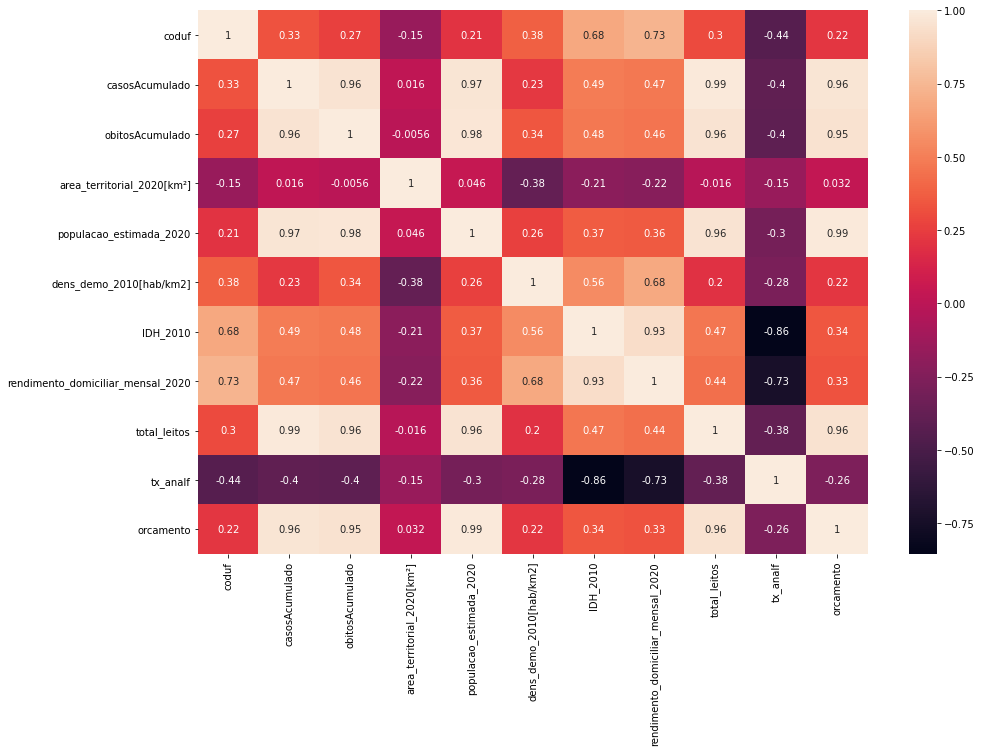

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(total_estado.corr(), annot=True)

In [133]:
total_estado.columns

Index(['regiao', 'estado', 'coduf', 'casosAcumulado', 'obitosAcumulado',
       'area_territorial_2020[km²]', 'populacao_estimada_2020',
       'dens_demo_2010[hab/km2]', 'IDH_2010',
       'rendimento_domiciliar_mensal_2020', 'total_leitos', 'tx_analf',
       'orcamento'],
      dtype='object')

In [134]:
col = ['area_territorial_2020[km²]', 'populacao_estimada_2020','dens_demo_2010[hab/km2]',
       'IDH_2010','rendimento_domiciliar_mensal_2020','total_leitos',
       'tx_analf', 'orcamento']

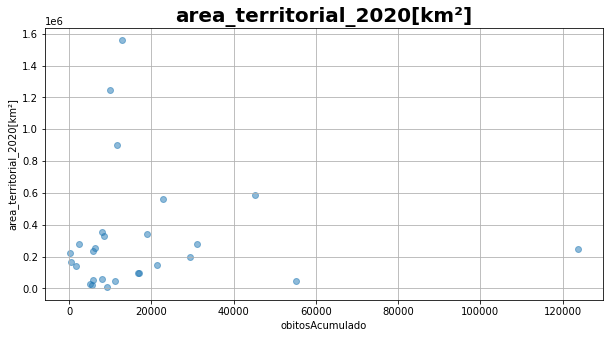

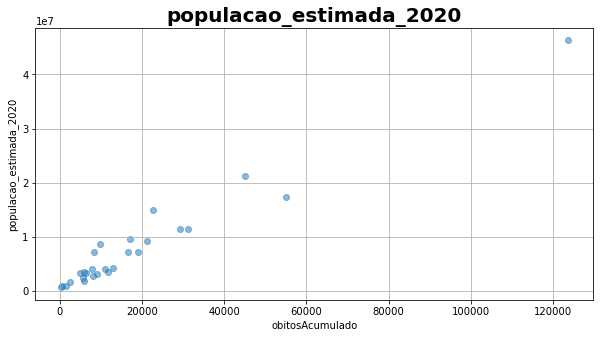

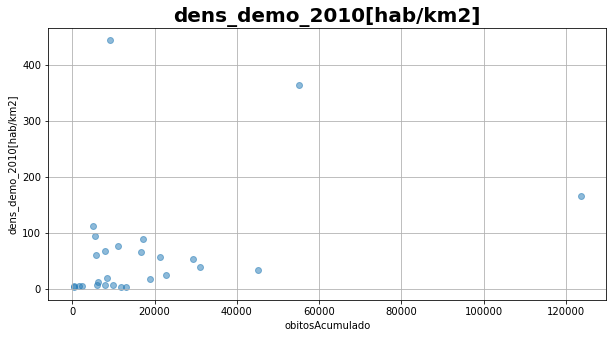

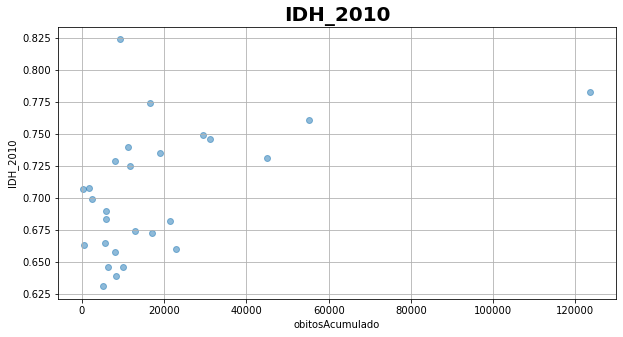

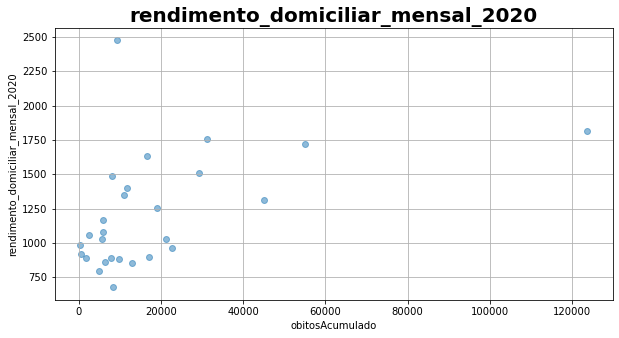

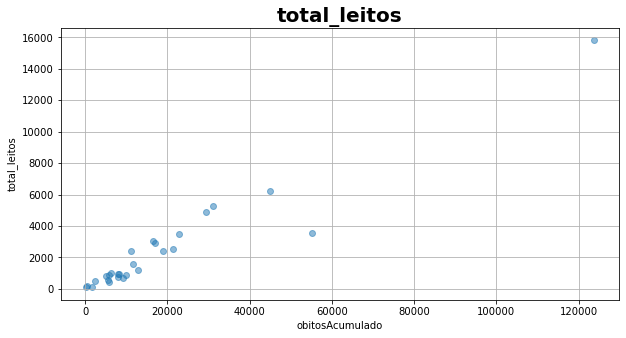

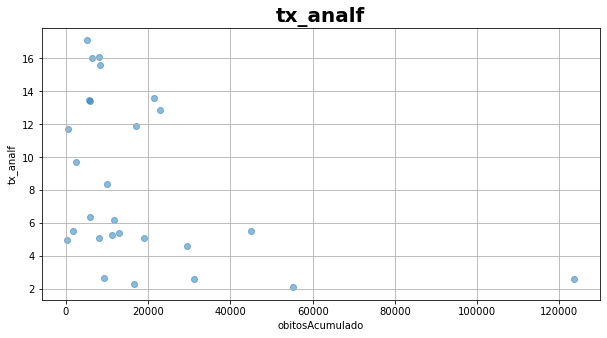

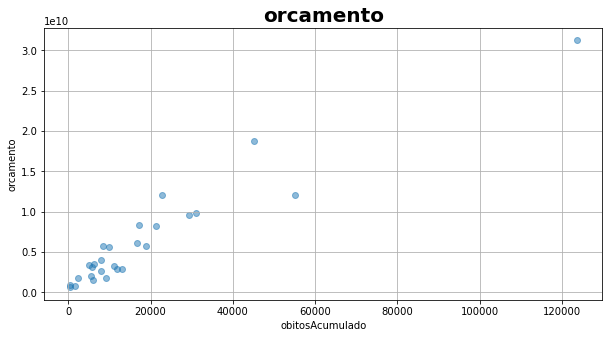

In [135]:
#Gráfico de dispersão
for coluna in col:
    plt.figure(figsize=(10,5))
    plt.scatter (x = total_estado['obitosAcumulado'], y = total_estado[coluna], alpha =0.5)
    plt.title(coluna, fontsize = 20, fontweight='bold')
    plt.xlabel('obitosAcumulado')
    plt.ylabel(coluna)
    plt.grid()

    plt.show()


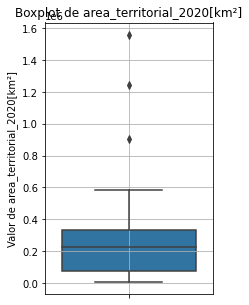

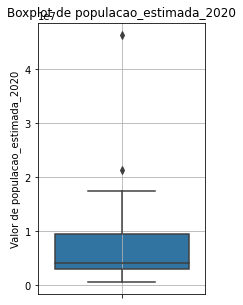

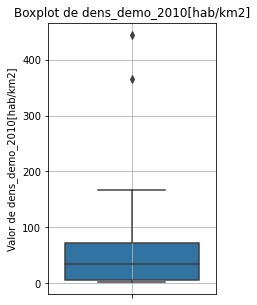

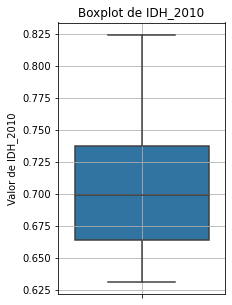

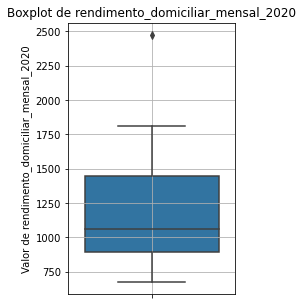

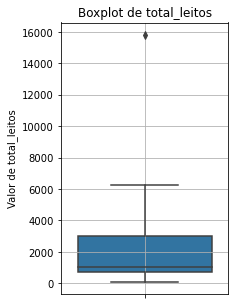

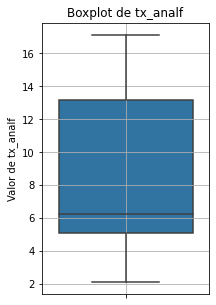

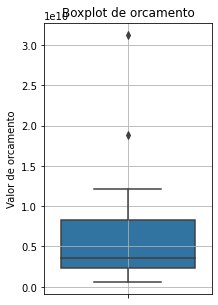

In [137]:
for i in col:
    plt.figure(figsize=(3,5))
    sns.boxplot(y=total_estado[i], orient='v')
    plt.title(f'Boxplot de {i}')
    plt.ylabel(f'Valor de {i}')
    plt.grid()
    
    plt.show()

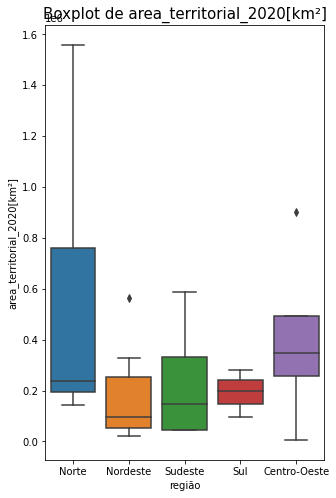

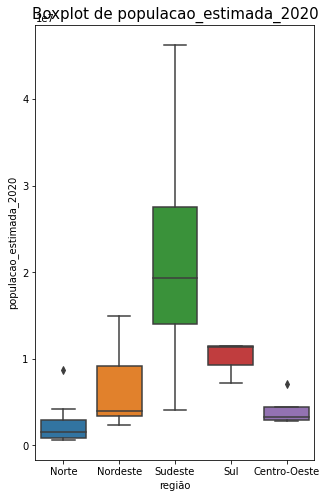

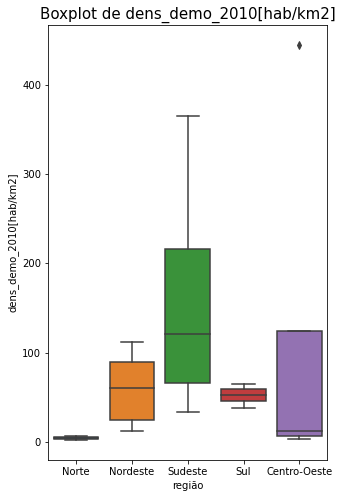

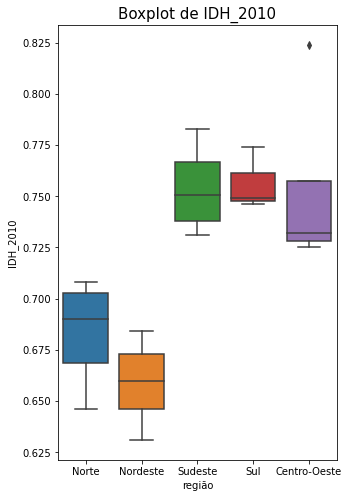

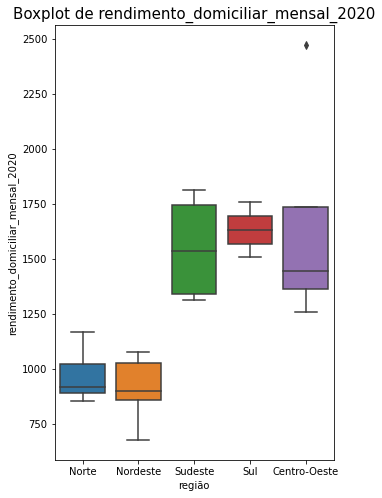

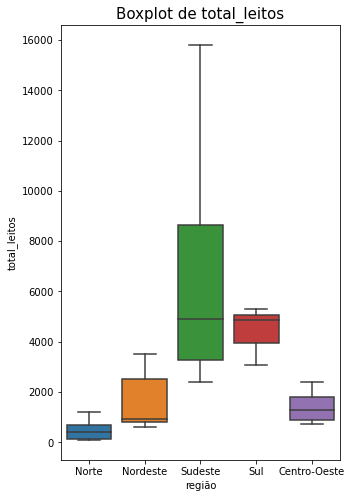

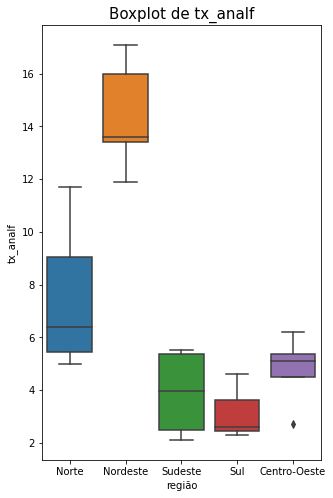

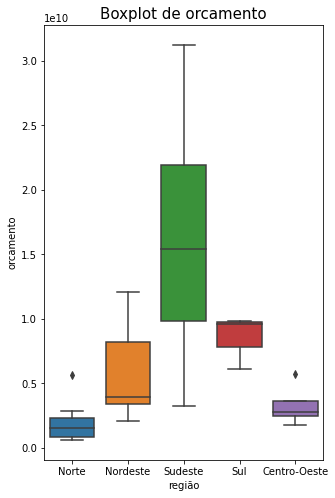

In [138]:
for col in col:
    plt.figure(figsize=(5,8))
    sns.boxplot(x= total_estado['regiao'], y= total_estado[col], orient='v')
    plt.title(f'Boxplot de {col}', fontsize = 15)
    plt.ylabel(col)
    plt.xlabel('região')
    
    plt.show()        

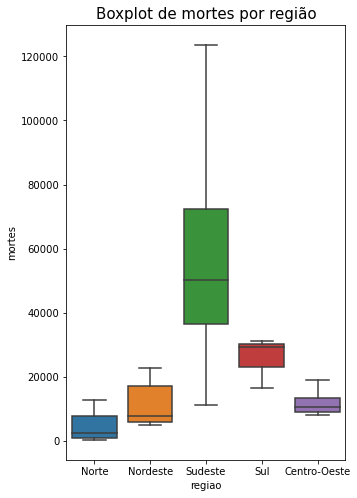

In [139]:
plt.figure(figsize=(5,8))
sns.boxplot(x= total_estado['regiao'], y= total_estado['obitosAcumulado'], orient='v')
plt.title(f'Boxplot de mortes por região', fontsize = 15)
plt.ylabel('mortes')
plt.xlabel('regiao')
    
plt.show()        

# Teste de cluster

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
total_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   regiao                             27 non-null     object 
 1   estado                             27 non-null     object 
 2   coduf                              27 non-null     int64  
 3   casosAcumulado                     27 non-null     int64  
 4   obitosAcumulado                    27 non-null     int64  
 5   area_territorial_2020[km²]         27 non-null     float64
 6   populacao_estimada_2020            27 non-null     int64  
 7   dens_demo_2010[hab/km2]            27 non-null     float64
 8   IDH_2010                           27 non-null     float64
 9   rendimento_domiciliar_mensal_2020  27 non-null     int64  
 10  total_leitos                       27 non-null     int64  
 11  tx_analf                           27 non-null     float64
 

In [145]:
colunas = ['coduf','casosAcumulado','obitosAcumulado','area_territorial_2020[km²]','populacao_estimada_2020',
           'dens_demo_2010[hab/km2]','IDH_2010','rendimento_domiciliar_mensal_2020','total_leitos',
           'tx_analf', 'orcamento']

In [146]:
norm = pd.DataFrame(data=total_estado[colunas])
norm.head()

,coduf,casosAcumulado,obitosAcumulado,area_territorial_2020[km²],populacao_estimada_2020,dens_demo_2010[hab/km2],IDH_2010,rendimento_domiciliar_mensal_2020,total_leitos,tx_analf,orcamento
0,11,236103,5897,237765.347,1796460,6.58,0.690,1169,425,6.4,1.504902e+09
1,12,40277,526,164173.431,894470,4.47,0.663,917,170,11.7,8.584413e+08
2,13,385562,12950,1559167.878,4207714,2.23,0.674,852,1188,5.4,2.888882e+09
3,14,18328,308,223644.527,631181,2.01,0.707,983,89,5.0,6.037676e+08
4,15,421802,9909,1245870.707,8690745,6.07,0.646,883,854,8.4,5.612037e+09


In [147]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit_transform(norm)

In [148]:
norm = pd.DataFrame(scaler, columns = norm.columns)
norm.head()

,coduf,casosAcumulado,obitosAcumulado,area_territorial_2020[km²],populacao_estimada_2020,dens_demo_2010[hab/km2],IDH_2010,rendimento_domiciliar_mensal_2020,total_leitos,tx_analf,orcamento
0,0.000000,0.060557,0.045314,0.149352,0.025522,0.010324,0.305699,0.274041,0.021367,0.286667,0.029407
1,0.023810,0.006103,0.001767,0.101978,0.005767,0.005557,0.165803,0.133963,0.005151,0.640000,0.008311
2,0.047619,0.102118,0.102498,1.000000,0.078333,0.000497,0.222798,0.097832,0.069889,0.220000,0.074572
3,0.071429,0.000000,0.000000,0.140262,0.000000,0.000000,0.393782,0.170650,0.000000,0.193333,0.000000
4,0.095238,0.112195,0.077842,0.798316,0.176520,0.009172,0.077720,0.115064,0.048649,0.420000,0.163438


In [149]:
from sklearn.cluster import KMeans

In [150]:
seg = norm[colunas].values
seg

array([[0.00000000e+00, 6.05573473e-02, 4.53141342e-02, 1.49352069e-01,
        2.55218170e-02, 1.03241839e-02, 3.05699482e-01, 2.74041134e-01,
        2.13672496e-02, 2.86666667e-01, 2.94073184e-02],
       [2.38095238e-02, 6.10342425e-03, 1.76748636e-03, 1.01977548e-01,
        5.76652774e-03, 5.55743816e-03, 1.65803109e-01, 1.33963313e-01,
        5.15103339e-03, 6.40000000e-01, 8.31093199e-03],
       [4.76190476e-02, 1.02117860e-01, 1.02497993e-01, 1.00000000e+00,
        7.83328462e-02, 4.97006664e-04, 2.22797927e-01, 9.78321290e-02,
        6.98887122e-02, 2.20000000e-01, 7.45716366e-02],
       [7.14285714e-02, 0.00000000e+00, 0.00000000e+00, 1.40261844e-01,
        0.00000000e+00, 0.00000000e+00, 3.93782383e-01, 1.70650361e-01,
        0.00000000e+00, 1.93333333e-01, 0.00000000e+00],
       [9.52380952e-02, 1.12195225e-01, 7.78423694e-02, 7.98316119e-01,
        1.76519715e-01, 9.17203208e-03, 7.77202073e-02, 1.15063924e-01,
        4.86486486e-02, 4.20000000e-01, 1.63438139e-

In [151]:
km = KMeans(n_clusters=5) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
km.fit(seg)

KMeans(n_clusters=5)

In [152]:
y_means = km.predict(seg)
y_means

array([0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 1])

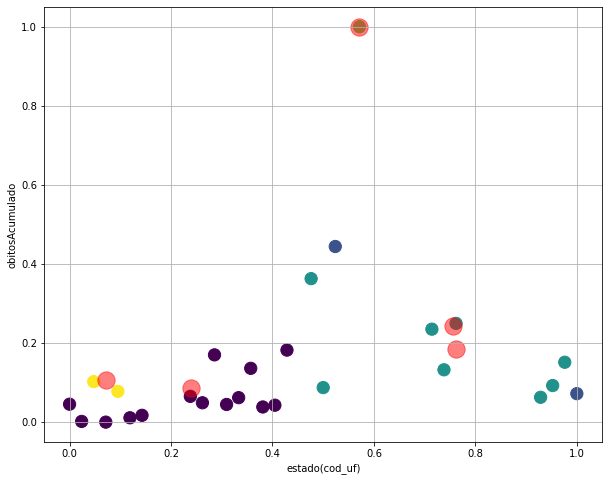

In [156]:
plt.figure(figsize = (10,8)) #define o tamanho da figura

plt.scatter(seg[:, 0], seg[:, 2], c=y_means, s = 150) #constrói o gráfco de dispersão com os grupos
centers = km.cluster_centers_ #encontra os centróides de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel('estado(cod_uf)')  #adiciona o label para o eixo X
plt.ylabel('obitosAcumulado') #adiciona o label para o eixo Y
plt.grid()
plt.show() # exibe o gráfico

C:\Users\rsoares\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

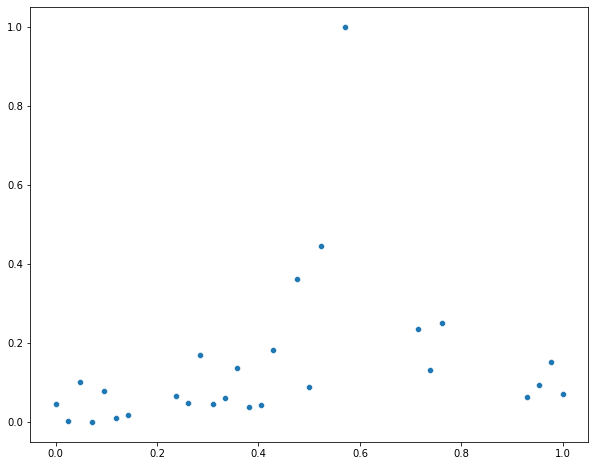

In [154]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(seg[:,0], seg[:,2]) #hue: colere conforme criterio passado (labes já estabelecidas previamente)